### Setup

In [3]:
# !pip install -q scikit-learn numpy pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

%matplotlib inline


### Load Data

In [4]:
    df_raw = pd.read_csv("/content/WDBC.csv")     # upload to Colab Files first
    # Drop ID (case-insensitive)
    id_like = [c for c in df_raw.columns if c.lower() == "id"]
    if id_like:
        df_raw = df_raw.drop(columns=id_like)
    # Encode labels M/B → 1/0
    df_raw["Diagnosis"] = df_raw["Diagnosis"].replace({"M":1, "B":0, "malignant":1, "benign":0})
    y = df_raw["Diagnosis"].astype(int).values
    X = df_raw.drop(columns=["Diagnosis"])
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)  # normalised features as required by the lab


/tmp/ipython-input-3113362189.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw["Diagnosis"] = df_raw["Diagnosis"].replace({"M":1, "B":0, "malignant":1, "benign":0})


### Train Test Split

In [5]:
Xs_train, Xs_test, y_train, y_test = train_test_split(
    Xs, y, test_size=0.30, random_state=1, stratify=y
)
Xs_train.shape, Xs_test.shape


((398, 30), (171, 30))

### Decision Trees

#### Train + Accuracy + Probabilities

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1)
tree_clf.fit(Xs_train, y_train)

# Probabilities for the test set (2 columns = P(class=0), P(class=1))
proba_dt = tree_clf.predict_proba(Xs_test)
print("Predict_proba shape:", proba_dt.shape)

acc_dt = tree_clf.score(Xs_test, y_test)
print(f"Decision Tree Accuracy: {acc_dt:.2f}")


Predict_proba shape: (171, 2)
Decision Tree Accuracy: 0.92


#### Visualisation

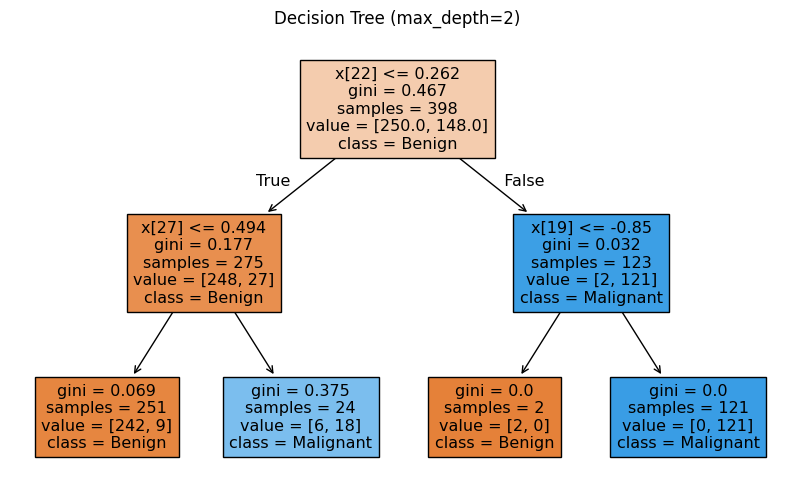

In [7]:
plt.figure(figsize=(10, 6))
tree.plot_tree(tree_clf, filled=True, feature_names=None, class_names=["Benign","Malignant"])
plt.title("Decision Tree (max_depth=2)")
plt.show()

### Random Forests

#### Train + Predict + Accuracy

In [8]:
rnd_clf = RandomForestClassifier(
    n_estimators=500, max_leaf_nodes=10, n_jobs=-1, random_state=1
)
rnd_clf.fit(Xs_train, y_train)

y_pred_rf = rnd_clf.predict(Xs_test)
acc_rf = rnd_clf.score(Xs_test, y_test)
print(f"Random Forest Accuracy: {acc_rf:.2f}")


Random Forest Accuracy: 0.94


#### Feature Importances (MDI) + Error bars

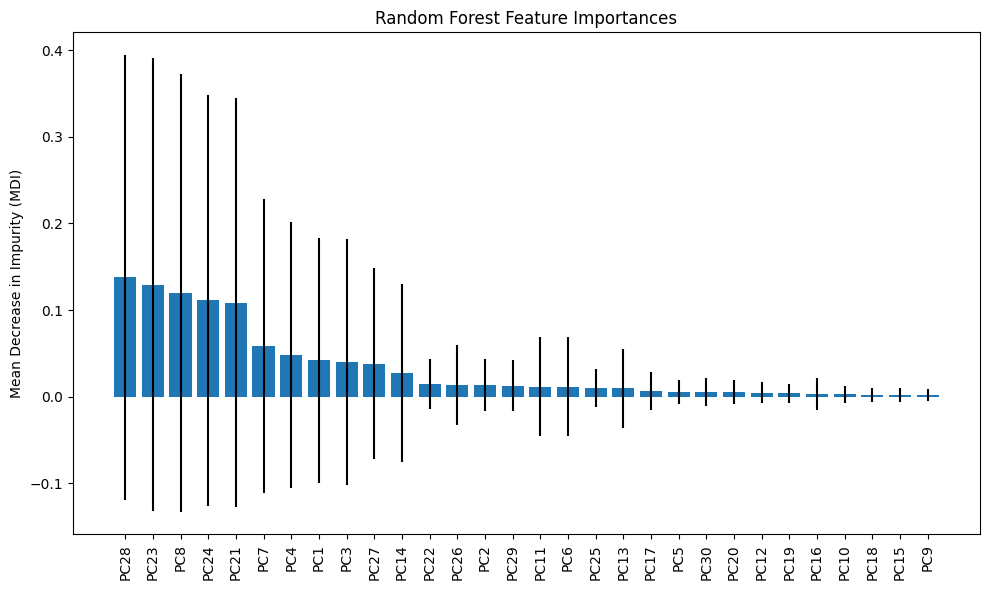

In [9]:
importances = rnd_clf.feature_importances_
std = np.std([est.feature_importances_ for est in rnd_clf.estimators_], axis=0)

# Build names
if USE_PCA_FILE:
    feature_names = [f"PC{i+1}" for i in range(importances.shape[0])]
else:
    feature_names = [c for c in df_raw.columns if c != "Diagnosis"]

# Sort by importance
order = np.argsort(importances)[::-1]
imp_sorted = importances[order]
std_sorted = std[order]
names_sorted = [feature_names[i] for i in order]

plt.figure(figsize=(10,6))
plt.bar(range(len(imp_sorted)), imp_sorted, yerr=std_sorted)
plt.xticks(range(len(imp_sorted)), names_sorted, rotation=90)
plt.ylabel("Mean Decrease in Impurity (MDI)")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

### MLP

In [10]:
mlp_clf = MLPClassifier(random_state=1, max_iter=300)
mlp_clf.fit(Xs_train, y_train)

proba_mlp = mlp_clf.predict_proba(Xs_test)
print("Predict_proba shape (MLP):", proba_mlp.shape)

acc_mlp = mlp_clf.score(Xs_test, y_test)
print(f"MLP Accuracy: {acc_mlp:.2f}")


Predict_proba shape (MLP): (171, 2)
MLP Accuracy: 0.96


### Results

In [11]:
print("Model Accuracy Summary")
print(f" - Decision Tree : {acc_dt:.2f}")
print(f" - Random Forest : {acc_rf:.2f}")
print(f" - MLP           : {acc_mlp:.2f}")


Model Accuracy Summary
 - Decision Tree : 0.92
 - Random Forest : 0.94
 - MLP           : 0.96
